# Các phép toán cơ bản với ảnh

* Các phép toán số học như phép cộng, phép nhân

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

### Hình ảnh gốc

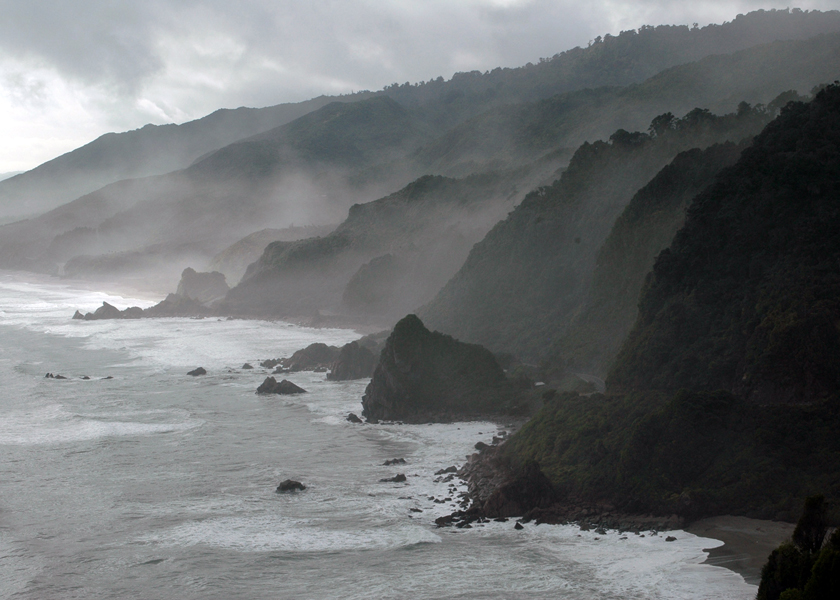

In [38]:
img_bgr = cv2.imread("image/New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Hiển thị 18x18 pixel image.
Image(filename="image/New_Zealand_Coast.jpg")

## Phép cộng hoặc Độ sáng
Phép toán đầu tiên chúng ta thảo luận là phép cộng đơn giản các hình ảnh. Điều này dẫn đến việc tăng hoặc giảm độ sáng của hình ảnh vì cuối cùng chúng ta sẽ tăng hoặc giảm giá trị cường độ của mỗi pixel theo cùng một lượng. Vì vậy, điều này sẽ dẫn đến sự tăng/giảm độ sáng toàn cục.

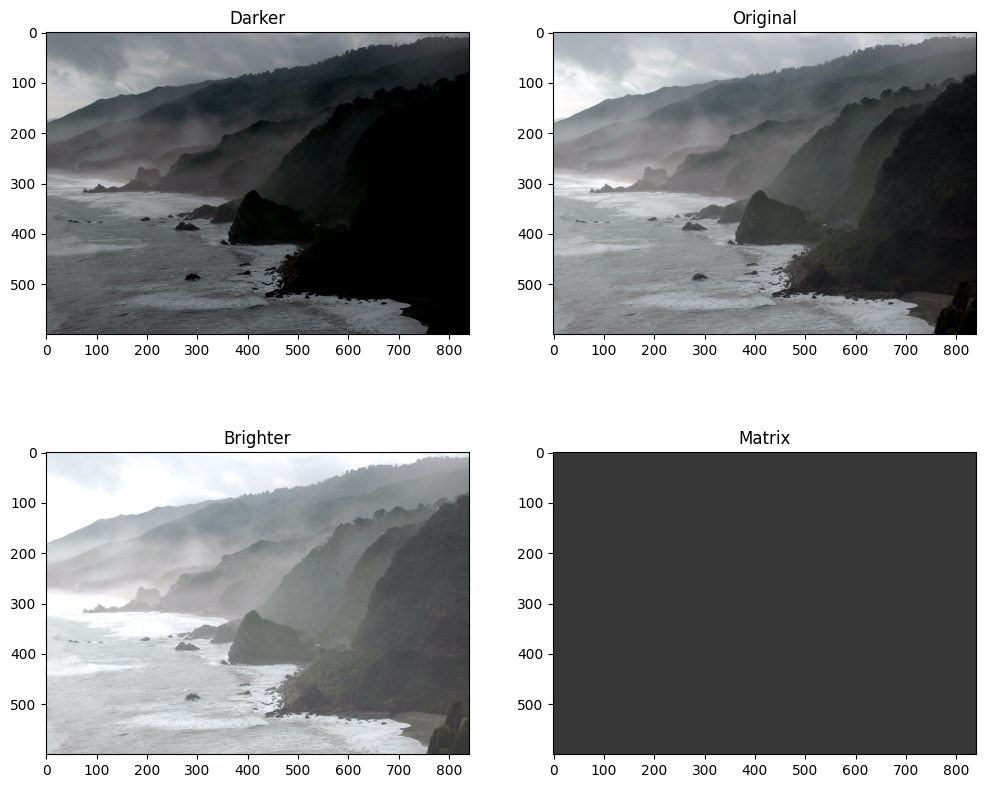

In [39]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 55
img_rgb_brighter = np.uint8(cv2.add(img_rgb, matrix))
img_rgb_darker   = np.uint8(cv2.subtract(img_rgb, matrix))


# Hiển thị ảnh
plt.figure(figsize=[12, 10])
plt.subplot(221); plt.imshow(img_rgb_darker);   plt.title("Darker");
plt.subplot(222); plt.imshow(img_rgb);          plt.title("Original");
plt.subplot(223); plt.imshow(img_rgb_brighter); plt.title("Brighter");
plt.subplot(224); plt.imshow(matrix);           plt.title("Matrix");

## Phép nhân hoặc Độ tương phản
Cũng giống như phép cộng có thể dẫn đến thay đổi độ sáng, phép nhân có thể được sử dụng để cải thiện độ tương phản của hình ảnh.

Độ tương phản là sự khác biệt về giá trị cường độ của các điểm ảnh trong hình ảnh. Nhân các giá trị cường độ với một hằng số có thể làm cho sự khác biệt lớn hơn hoặc nhỏ hơn (nếu hệ số nhân < 1).

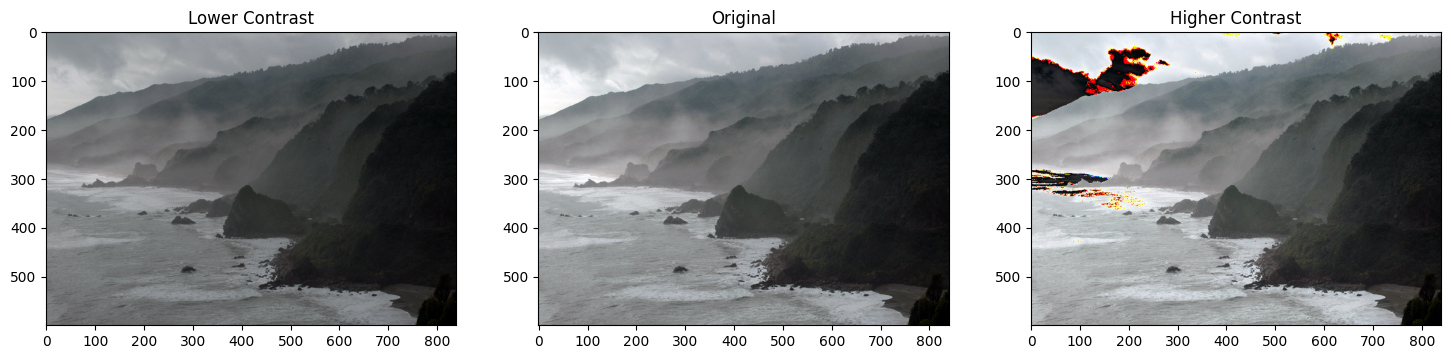

In [40]:
matrix_low_contrast = np.ones(img_rgb.shape) * 0.8
matrix_high_contast = np.ones(img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_high_contast))

# Hiển thị ảnh
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);   plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);          plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Higher Contrast");

### Chuyện gì đã xảy ra?
Bạn có thấy màu sắc kỳ lạ ở một số vùng của hình ảnh sau khi nhân không?

Vấn đề là sau khi nhân, các giá trị vốn đã cao lại trở nên lớn hơn 255. Do đó, vấn đề tràn số. Chúng ta khắc phục điều này như thế nào?

### Xử lý tràn bằng cách sử dụng `np.clip`

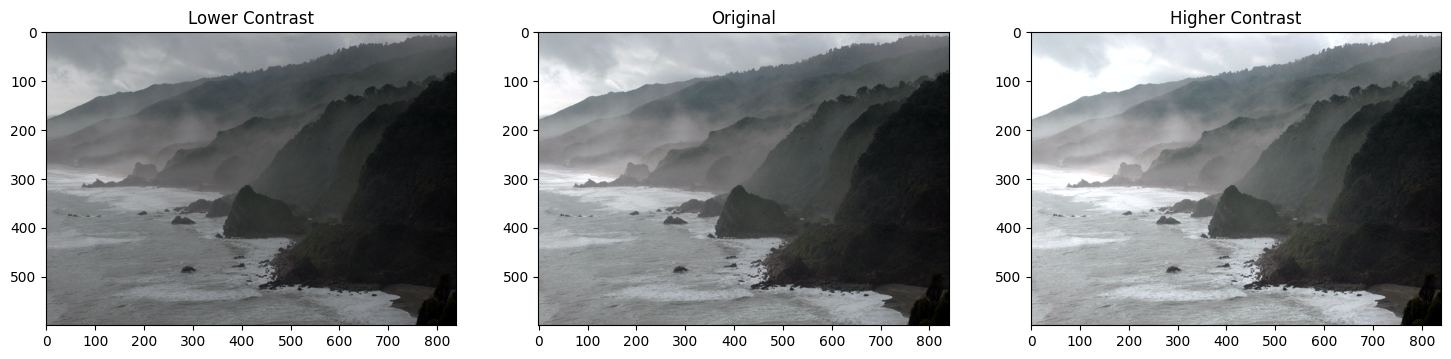

In [41]:
matrix_low_contrast = np.ones(img_rgb.shape) * 0.8
matrix_high_contast = np.ones(img_rgb.shape) * 1.2

img_rgb_lower  = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix_high_contast), 0, 255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);        plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher); plt.title("Higher Contrast");